In [2]:
import json
import re
from collections import Counter

In [3]:
diacl = json.load(open('data/wordlist-7.json', encoding='utf-8'))
colours = diacl["WordLists"]["7"]["WordListCategories"]["11025"]["WordListItems"]
colour_dict = {s["Name"].split()[-1] : [diacl["Lexemes"][str(l)] for l in s["ConnectedLexemes"]] for s in colours.values()}
#{k: [v["Meaning"] for v in vs] for k, vs in colour_dict.items() if "Meaning" in .keys()}

colex = {}
for k, vs in colour_dict.items():
    for v in vs:
        if "Meaning" in v.keys() and "FkLanguageId" in v.keys():
            if v["Meaning"] != k:
                lang = diacl["Languages"][str(v["FkLanguageId"])]["Name"]
                colex[k] = colex.get(k, []) + [{"Meaning": v["Meaning"], "Language": lang, "Form": v["FormTranscriptionPlain"]}]

colex["yellow"]

[{'Meaning': 'red-yellow, yellow-brown',
  'Language': 'Classical Greek',
  'Form': "ki'rros"},
 {'Meaning': 'citron tree', 'Language': 'Classical Greek', 'Form': 'kítrion'},
 {'Meaning': 'gold', 'Language': 'English', 'Form': 'gold'},
 {'Meaning': 'yelllow', 'Language': 'Jingpho', 'Form': 'sit'},
 {'Meaning': 'bitter', 'Language': 'Latin', 'Form': 'amarus'},
 {'Meaning': 'bay, chestnut brown', 'Language': 'Latin', 'Form': 'badius'},
 {'Meaning': 'yellow, blonde', 'Language': 'Latin', 'Form': 'flāvus'},
 {'Meaning': 'yellowish', 'Language': 'Latin', 'Form': 'helvus'},
 {'Meaning': 'yellow, white spotted',
  'Language': 'Mandarin Chinese',
  'Form': 'huáng'},
 {'Meaning': 'yellowish', 'Language': 'Medieval Latin', 'Form': 'amarellus'},
 {'Meaning': 'yelllow', 'Language': 'Newar', 'Form': 'mhāsu'},
 {'Meaning': 'yellow, gold', 'Language': 'Nuclear Burmese', 'Form': 'hrwe'},
 {'Meaning': 'yellow, dry as leaf',
  'Language': 'Nuclear Burmese',
  'Form': 'lyo'},
 {'Meaning': 'gold', 'Langua

In [16]:
colex_count = {k: Counter([w for w in ", ".join([v["Meaning"] for v in vs]).replace(';',',').split(", ") if k not in w]) for k, vs in colex.items()}

colex_count["yellow"]

Counter({'gold': 9,
         'white': 4,
         'bright': 3,
         'oil': 3,
         'yelllow': 2,
         'to glow': 2,
         'dark': 2,
         'pale': 2,
         'green': 2,
         'shine': 2,
         'butter': 2,
         'lamp': 2,
         'citron tree': 1,
         'bitter': 1,
         'bay': 1,
         'chestnut brown': 1,
         'blonde': 1,
         'white spotted': 1,
         'dry as leaf': 1,
         'bright colour of health': 1,
         'dusky': 1,
         'faded': 1,
         'fallow': 1,
         'black': 1,
         'dirty': 1,
         'honey': 1,
         'to gleam': 1,
         'glimmer': 1,
         'amber': 1,
         'spice': 1,
         'turmeric': 1,
         'blue': 1,
         'bile': 1,
         'golden': 1,
         'light': 1})

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd

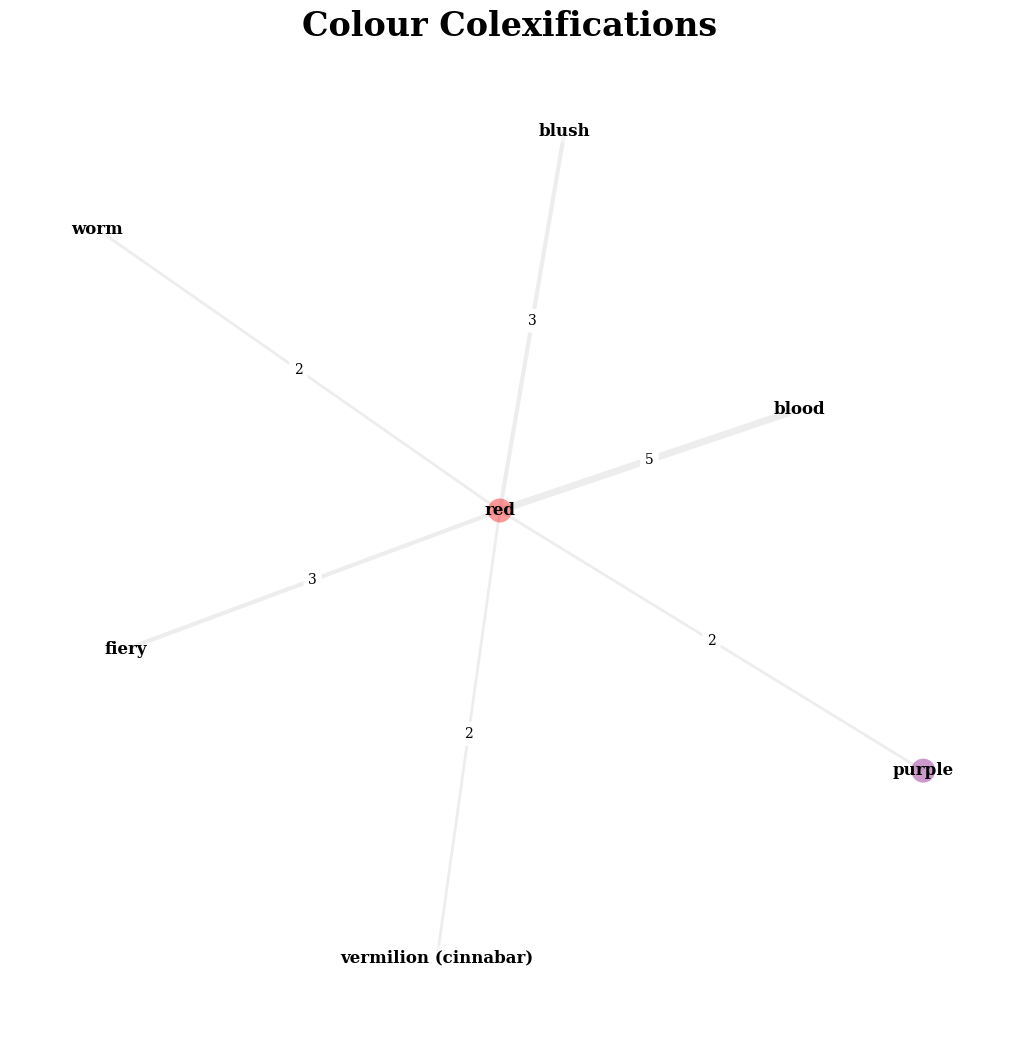

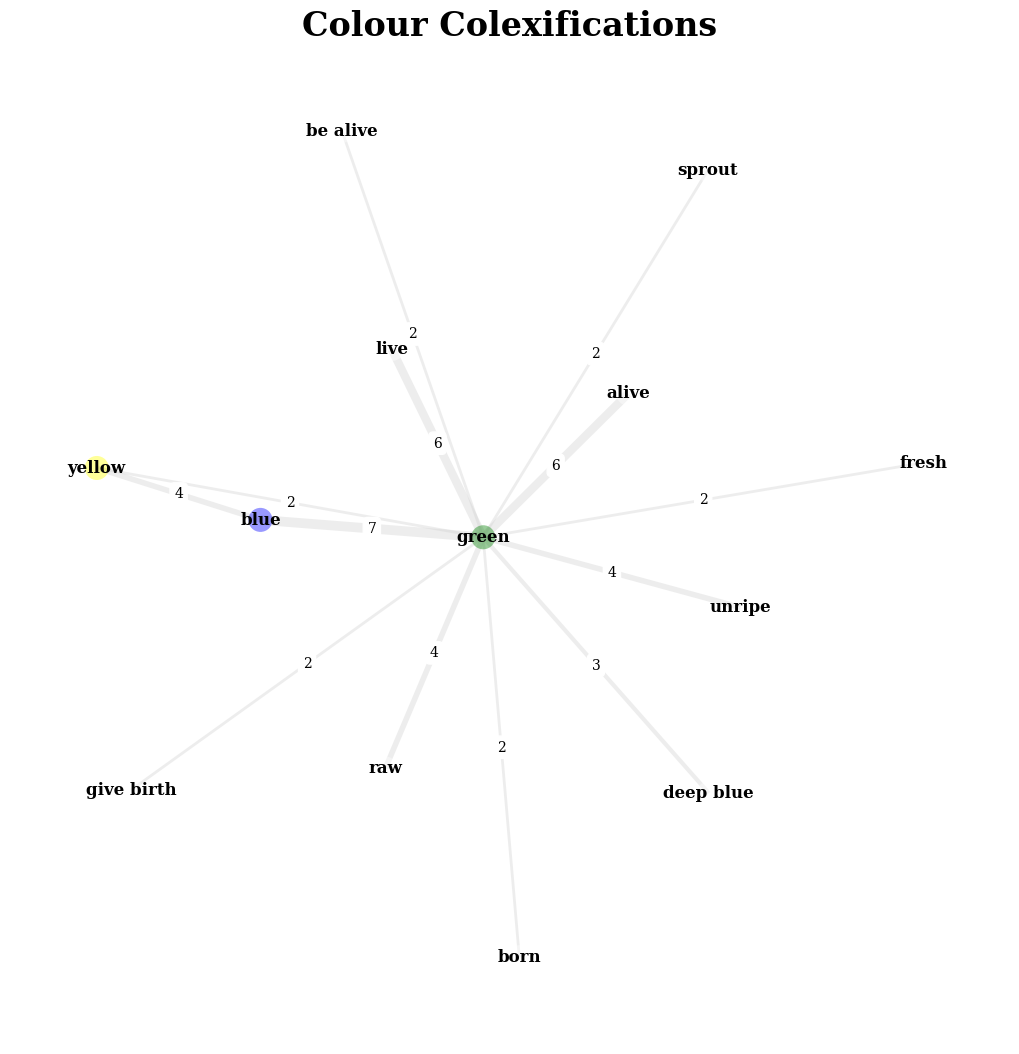

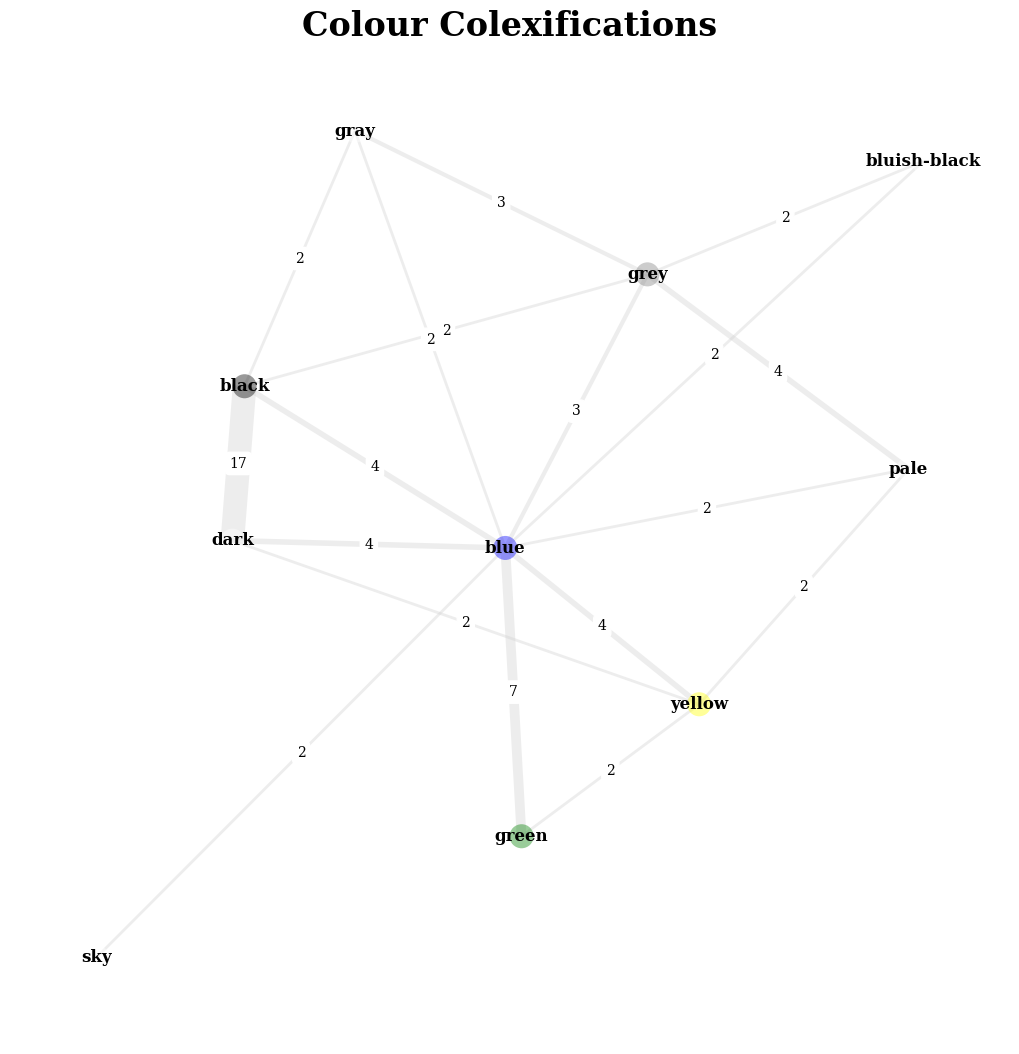

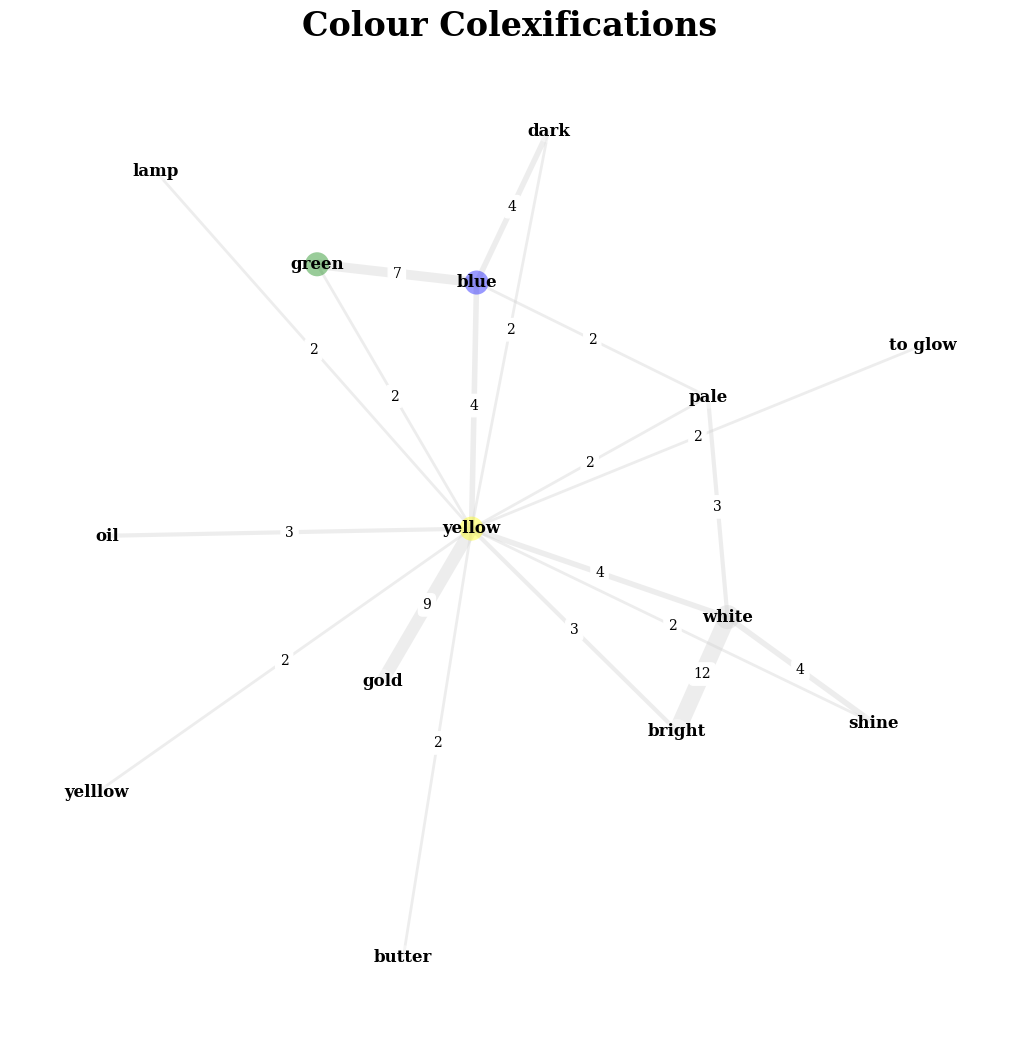

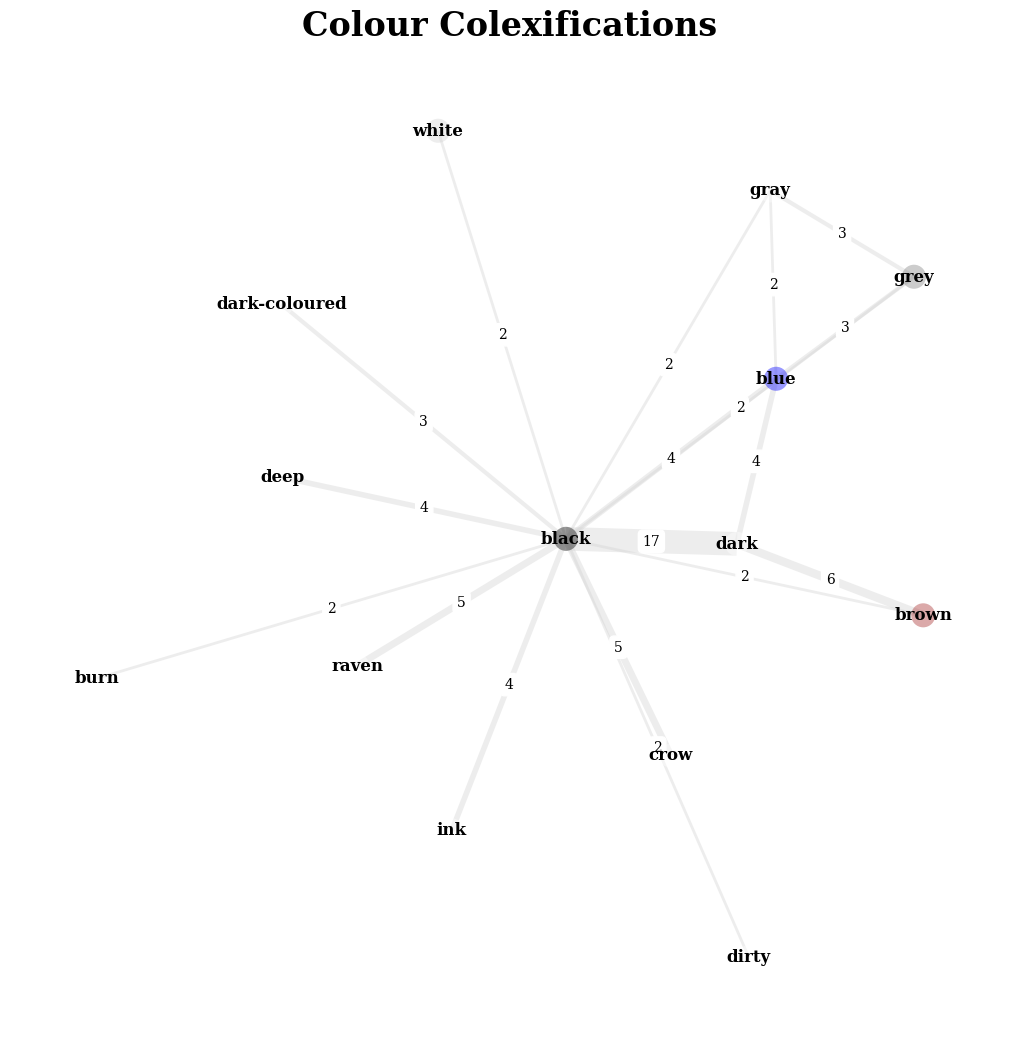

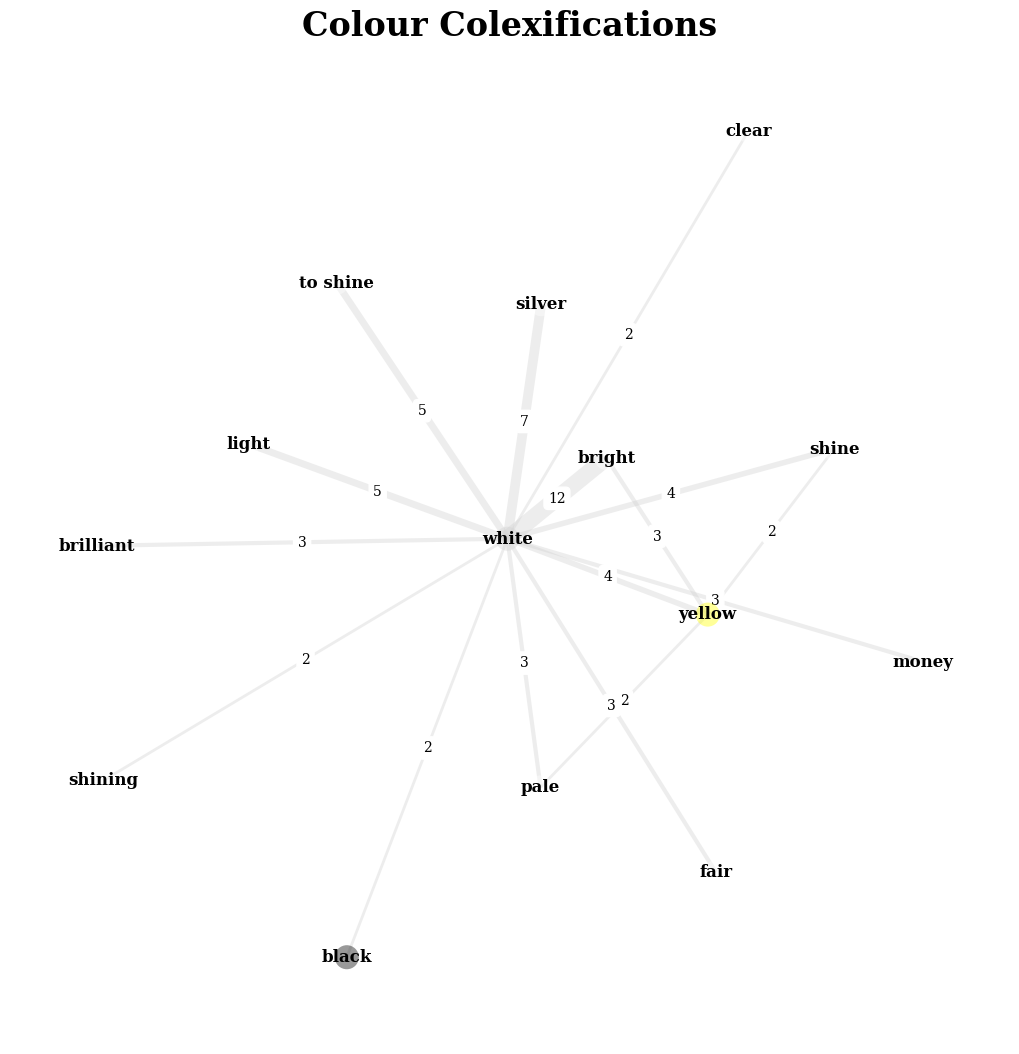

In [41]:
for colour in ["red", "green", "blue", "yellow", "black", "white"]:

    g = nx.Graph()
    for k, vs in colex_count.items():
        for v, c in vs.items():
            if c > 1:
                g.add_edge(k, v, weight=c)

    c = colour

    g = g.subgraph([c] + list(g.neighbors(c)))

    cnodes = ["red", "green", "blue", "yellow", "black", "white", "purple", "brown", "grey"]
    noi = cnodes.copy()
    colour_dict = {}
    for n in noi:
        if n in g.nodes():
            colour_dict[n] = n
            neighbors = list(g.neighbors(n))
            noi = noi + neighbors

    pos = nx.spring_layout(g)

    colour_list = list(pd.Series(pos.keys()).replace(colour_dict))

    def replace_colours(strings):
        r = []
        for s in strings:
            if s == "white":
                r.append("lightgrey")
            elif s in cnodes:
                r.append(s)
            else:
                r.append("white")
        return r

    colour_list = replace_colours(colour_list)

    plt.figure(figsize=(10,10))

    edge_labels = nx.get_edge_attributes(g, 'weight')
    edge_widths = [g[u][v]['weight'] for u, v in g.edges()]

    nx.draw(g, pos, font_family="serif",  edge_color='lightgrey', width=edge_widths, node_color=colour_list, alpha=0.4, linewidths=0)

    nx.draw_networkx_labels(g, pos,  font_family="serif",  font_weight='bold')
    nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, font_family="serif", rotate=False)

    plt.title("Colour Colexifications", fontdict={'fontsize': 24, 'fontweight': 'bold', 'fontname': 'serif'})
    plt.show()